#Team- Samuela, Nivetha, Pavithra, Haripriya

In [1]:
!pip install kaggle

import os
from google.colab import files

uploaded = files.upload()

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d shawon10/ckplus

!unzip ckplus.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json
  0% 0.00/3.63M [00:00<?, ?B/s]
100% 3.63M/3.63M [00:00<00:00, 112MB/s]
Archive:  ckplus.zip
  inflating: CK+48/anger/S010_004_00000017.png  
  inflating: CK+48/anger/S010_004_00000018.png  
  inflating: CK+48/anger/S010_004_00000019.png  
  inflating: CK+48/anger/S011_004_00000019.png  
  inflating: CK+48/anger/S011_004_00000020.png  
  inflating: CK+48/anger/S011_004_00000021.png  
  inflating: CK+48/anger/S014_003_00000028.png  
  inflating: CK+48/anger/S014_003_00000029.png  
  inflating: CK+48/anger/S014_003_00000030.png  
  inflating: CK+48/anger/S022_005_00000030.png  
  inflating: CK+48/anger/S022_005_00000031.png  
  inflating: CK+48/anger/S022_005_00000032.png  
  inflating: CK+48/anger/S026_003_00000013.png  
  inflating: CK+48/anger/S026_003_00000014.png  
  inflating: CK+48/anger/S026_003_00000015.png  
  inflating: CK+48/anger/S028_001_00000022.png  
  inflating: CK+48/anger/S028_001_00000023.png  
  inflating: CK+48/anger/S028_001_000000

In [2]:
import cv2
import numpy as np
import os

#Path to the CK+ dataset folder
dataset_folder = 'CK+48'

#List to store the images and labels
dataset = []
labels = []

#Function to preprocess the images
def preprocess_image(image):
    #Resize the image
    resized_image = cv2.resize(image, (48,48))

    return resized_image

#Iterate over the CK+ dataset folder and process the images
for emotion_folder in os.listdir(dataset_folder):
    emotion_folder_path = os.path.join(dataset_folder, emotion_folder)
    if not os.path.isdir(emotion_folder_path):
        continue

    emotion_label = emotion_folder.split("_")[0].lower()  #Extract the emotion label from the folder name

    for image_file in os.listdir(emotion_folder_path):
        image_path = os.path.join(emotion_folder_path, image_file)

        #Read the image using OpenCV
        image = cv2.imread(image_path)

        if image is not None:
            #Preprocess the image
            preprocessed_image = preprocess_image(image)

            #Convert the preprocessed image to a numpy array
            image_array = np.array(preprocessed_image)

            #Add the image and label to the dataset
            dataset.append(image_array)
            labels.append(emotion_label)

#Convert the dataset and labels to numpy arrays
dataset = np.array(dataset)
labels = np.array(labels)

#Print the shape of the dataset and labels
print("Dataset shape:", dataset.shape)
print("Labels shape:", labels.shape)


Dataset shape: (981, 48, 48, 3)
Labels shape: (981,)


In [7]:
import cv2
import numpy as np
from skimage.feature import hog
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#Path to the CK+ dataset folder
dataset_folder = 'CK+48'

#List to store the HOG features and labels
features = []
labels = []

#Function to extract HOG features from an image
def extract_hog_features(image):
    #Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #Calculate HOG features
    hog_features = hog(gray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2))

    return hog_features

#Iterate over the CK+ dataset folder and extract HOG features
for emotion_folder in os.listdir(dataset_folder):
    emotion_folder_path = os.path.join(dataset_folder, emotion_folder)
    if not os.path.isdir(emotion_folder_path):
        continue

    emotion_label = emotion_folder.split("_")[0].lower()  # Extract the emotion label from the folder name

    for image_file in os.listdir(emotion_folder_path):
        image_path = os.path.join(emotion_folder_path, image_file)

        #Read the image using OpenCV
        image = cv2.imread(image_path)

        if image is not None:
            #Extract HOG features from the image
            hog_features = extract_hog_features(image)

            #Add the HOG features and label to the dataset
            features.append(hog_features)
            labels.append(emotion_label)

#Convert the features and labels to numpy arrays
features = np.array(features)
labels = np.array(labels)

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

#Create an SVM classifier with RBF Kernel
classifier = svm.SVC(C=1,kernel='rbf')

#Train the SVM classifier
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

#Calculate overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", accuracy)

#Perform cross-validation
cross_val_scores = cross_val_score(classifier, features, labels, cv=5)

#Print the cross-validation scores
print('Cross-validation scores:', cross_val_scores)
print('Average score:', cross_val_scores.mean())

#Calculate emotion-wise accuracy
unique_labels = np.unique(labels)
emotionwise_accuracy = {}
for label in unique_labels:
    label_indices = np.where(y_test == label)[0]
    label_predictions = y_pred[label_indices]
    label_accuracy = accuracy_score(y_test[label_indices], label_predictions)
    emotionwise_accuracy[label] = label_accuracy

#Print emotion-wise accuracy
for label, acc in emotionwise_accuracy.items():
    print(f"Accuracy for {label}: {acc}")


Overall Accuracy: 0.9796954314720813
Cross-validation scores: [0.97969543 0.96428571 0.96938776 0.9744898  0.98979592]
Average score: 0.97553092302911
Accuracy for anger: 1.0
Accuracy for contempt: 0.875
Accuracy for disgust: 1.0
Accuracy for fear: 0.9333333333333333
Accuracy for happy: 1.0
Accuracy for sadness: 0.875
Accuracy for surprise: 1.0


In [ ]:
#accessing my drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<ipython-input-26-fecdba2e7b1b>:24: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_feature = hog(preprocessed_image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), multichannel=False)


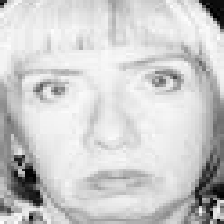

Predicted Emotion: ['sadness']


<ipython-input-26-fecdba2e7b1b>:24: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_feature = hog(preprocessed_image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), multichannel=False)


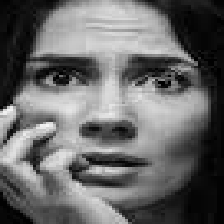

Predicted Emotion: ['happy']


<ipython-input-26-fecdba2e7b1b>:24: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_feature = hog(preprocessed_image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), multichannel=False)


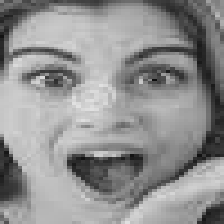

Predicted Emotion: ['surprise']


<ipython-input-26-fecdba2e7b1b>:24: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_feature = hog(preprocessed_image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), multichannel=False)


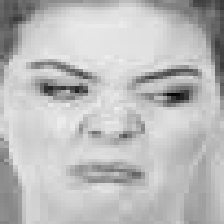

Predicted Emotion: ['disgust']


<ipython-input-26-fecdba2e7b1b>:24: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_feature = hog(preprocessed_image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), multichannel=False)


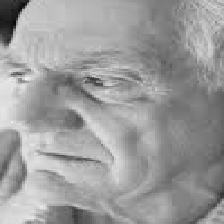

Predicted Emotion: ['surprise']


<ipython-input-26-fecdba2e7b1b>:24: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_feature = hog(preprocessed_image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), multichannel=False)


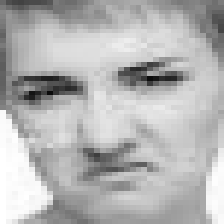

Predicted Emotion: ['anger']


<ipython-input-26-fecdba2e7b1b>:24: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_feature = hog(preprocessed_image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), multichannel=False)


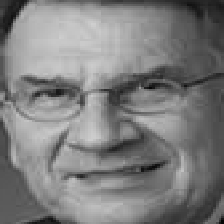

Predicted Emotion: ['happy']


<ipython-input-26-fecdba2e7b1b>:24: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_feature = hog(preprocessed_image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), multichannel=False)


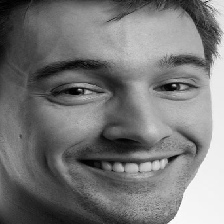

Predicted Emotion: ['happy']


In [ ]:
import random
from PIL import Image

#[ath to test folder
test_folder = '/content/drive/MyDrive/test'

#list all image files in test folder
image_files = [f for f in os.listdir(test_folder) if os.path.isfile(os.path.join(test_folder, f))]

#randomly select 8 images
random_images = random.sample(image_files, 8)

#preprocess and predict labels for the selected images
for image_file in random_images:
    image_path = os.path.join(test_folder, image_file)

    #read and preprocess the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (48, 48))
    preprocessed_image = resized.astype('float32') / 255.0

    #extract HOG features from preprocessed image
    hog_feature = hog(preprocessed_image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), multichannel=False)

    #reshape HOG features to match input shape of our model
    hog_feature = hog_feature.reshape(1, -1)

    #predict label for HOG features using trained model
    predicted_label = classifier.predict(hog_feature)

    #show image and predicted label
    pil_image = Image.open(image_path)
    pil_image.show()
    print('Predicted Emotion:', predicted_label)

    #wait for a key press to move to the next image
    cv2.waitKey(0)

#close the OpenCV windows
cv2.destroyAllWindows()